# [OpenAlex Python](https://github.com/Mearman/openalex-python) API Example

Documentation: https://github.com/Mearman/openalex-python


## Introduction

This notebook demonstrates how to use an OpenAlex Python API Client to query the OpenAlex database and generate visualizations.

The OpenAlex database is a database of academic publications and their citations.

The OpenAlex API is a REST API that allows you to query the OpenAlex database. The Documentation for the API can be found here: https://docs.openalex.org/

The OpenAlex Python API Client is a Python package that makes it easier to use the OpenAlex API. The package can be found here: https://github.com/Mearman/openalex-python

The specification from which the OpenAlex Python API Client was generated can be found here: https://github.com/Mearman/openalex-api-spec

An explorer for the REST API can be found here: https://mearman.github.io/openalex-swagger-ui-react/


## [OpenAlex API documentation](https://docs.openalex.org/)

### Overview

<!-- https://github.com/ourresearch/openalex-docs/blob/main/.gitbook/assets/OpenAlex-logo-5.png -->
<!-- https://github.com/ourresearch/openalex-docs/blob/main/.gitbook/assets/openalex_logo_text_transparent_20240117.png -->

<img src="https://raw.githubusercontent.com/ourresearch/openalex-docs/main/.gitbook/assets/openalex_logo_text_transparent_20240117.png" style="background-color:white">

[**OpenAlex**](https://openalex.org) is a fully open catalog of the global research system. It's named after the [ancient Library of Alexandria](https://en.wikipedia.org/wiki/Library_of_Alexandria) and made by the nonprofit [OurResearch](https://ourresearch.org/).

This is the technical documentation for the **OpenAlex API.** Here, you can learn how to set up your code to access OpenAlex's data. If you want to explore the data as a human, you may be more interested in [**OpenAlex Web**](https://help.openalex.org)**.**

### Data[](https://docs.openalex.org//#data)

The OpenAlex dataset describes scholarly [_entities_](https://docs.openalex.org/api-entities/entities-overview) and how those entities are connected to each other. Types of entities include [works](https://docs.openalex.org/api-entities/works), [authors](https://docs.openalex.org/api-entities/authors), [sources](https://docs.openalex.org/api-entities/sources), [institutions](https://docs.openalex.org/api-entities/institutions), [concepts](https://docs.openalex.org/api-entities/concepts), [publishers](https://docs.openalex.org/api-entities/publishers), and [funders](https://docs.openalex.org/api-entities/funders).

Together, these make a huge web (or more technically, heterogeneous directed [graph](https://en.wikipedia.org/wiki/Graph_theory)) of hundreds of millions of entities and billions of connections between them all.

### Access[](https://docs.openalex.org//#access)

The API is the primary way to get OpenAlex data. It's free and requires no authentication. The daily limit for API calls is 100,000 requests per user per day. For best performance, [add your email](https://docs.openalex.org/how-to-use-the-api/rate-limits-and-authentication#the-polite-pool) to all API requests, like `mailto=example@domain.com`. [Learn more](https://docs.openalex.org/how-to-use-the-api/api-overview)

There is also a complete database snapshot available to download. [Learn more about the data snapshot here.](https://docs.openalex.org/download-all-data/openalex-snapshot)

The API has a limit of 100,000 calls per day, and the snapshot is updated monthly. If you need a higher limit, or more frequent updates, please look into [**OpenAlex Premium.**](https://openalex.org/pricing)

The web interface for OpenAlex is currently in development, with a beta launch coming in late 2023. [Sign up to be notified about the launch here.](https://forms.gle/NDoXAQVKGQLpkF5U8)

### Why OpenAlex?[](https://docs.openalex.org//#why-openalex)

OpenAlex offers an open replacement for industry-standard scientific knowledge bases like Elsevier's Scopus and Clarivate's Web of Science. [Compared to](https://openalex.org/about#comparison) these paywalled services, OpenAlex offers significant advantages in terms of inclusivity, affordability, and avaliability.

OpenAlex is:

- _Big —_ We have about twice the coverage of the other services, and have significantly better coverage of non-English works and works from the Global South.

- _Easy —_ Our service is fast, modern, and well-documented.

- _Open —_ Our complete dataset is free under the CC0 license, which allows for transparency and reuse.

Many people and organizations have already found great value using OpenAlex. Have a look at the [Testimonials](https://openalex.org/testimonials) to hear what they've said!

### Contact[](https://docs.openalex.org//#contact)

For tech support and bug reports, please visit our [help page](https://openalex.org/help). You can also join the [OpenAlex user group](https://groups.google.com/g/openalex-users), and follow us on [Twitter (@OpenAlex_org)](https://twitter.com/openalex_org) and [Mastodon](https://mastodon.social/@OpenAlex).

### Citation[](https://docs.openalex.org//#citation)

If you use OpenAlex in research, please cite [this paper](https://arxiv.org/abs/2205.01833):

> Priem, J., Piwowar, H., & Orr, R. (2022). _OpenAlex: A fully-open index of scholarly works, authors, venues, institutions, and concepts_. ArXiv. https://arxiv.org/abs/2205.01833


## [Entities](https://docs.openalex.org/)

The OpenAlex dataset describes scholarly _entities_ and how those entities are connected to each other. Together, these make a huge web (or more technically, heterogeneous directed [graph](https://en.wikipedia.org/wiki/Graph_theory)) of hundreds of millions of entities and billions of connections between them all.


In [ ]:
%pip install networkx matplotlib > /dev/null 2>&1

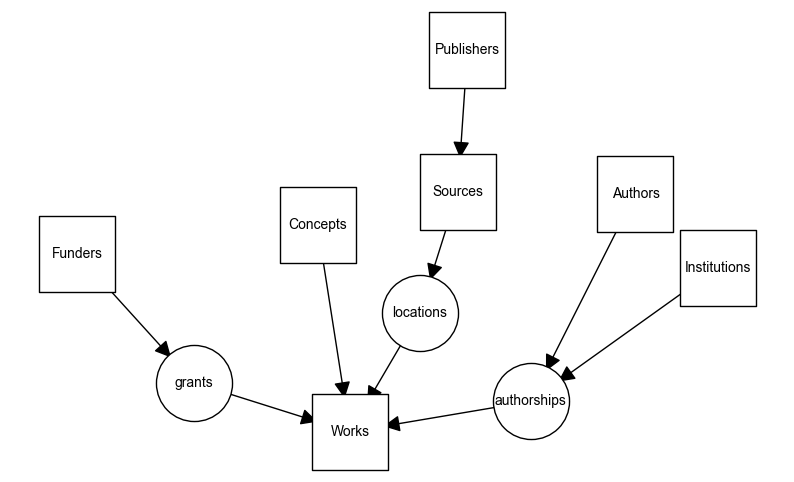

In [75]:
# @title Entity graph
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes
nodes = [
    "Authors",
    "Concepts",
    "Funders",
    "Institutions",
    "Publishers",
    "Sources",
    "Works",
    "authorships",
    "grants",
    "locations"
]
G.add_nodes_from(nodes)

# Add edges
edges = [(
    "Authors", "authorships"),
    ("authorships", "Works"),
    ("Concepts", "Works"),
    ("Funders", "grants"),
    ("grants", "Works"),
    ("Institutions", "authorships"),
    ("locations", "Works"),
    ("Publishers", "Sources"),
    ("Sources", "locations")
]
G.add_edges_from(edges)

pos = nx.spring_layout(G, seed=5)

plt.figure(figsize=(10, 6))

uppercase_nodes = [node for node in G.nodes if node.isupper()]
lowercase_nodes = [node for node in G.nodes if node.islower()]
other_nodes = [node for node in G.nodes if node not in uppercase_nodes and node not in lowercase_nodes]

node_size = 3000

nx.draw_networkx_nodes(
    G, pos,
    nodelist=other_nodes,
    node_size=node_size,
    node_shape='s',
    edgecolors='black',
    node_color='white'
)

nx.draw_networkx_nodes(
    G, pos,
    nodelist=lowercase_nodes,
    node_size=node_size,
    node_shape='o',
    edgecolors='black',
    node_color='white'
)

# Draw labels for all nodes
nx.draw_networkx_labels(
    G, pos,
    font_size=10
)

# Draw edges
nx.draw_networkx_edges(
    G, pos,
    arrows=True,
    arrowstyle='-|>',
    arrowsize=25,
    node_shape='S',
    node_size=node_size * (4 / 5),
)

plt.axis('off')
plt.show()

Learn more about the OpenAlex entities:

- [Works](https://docs.openalex.org/api-entities/works): Scholarly documents like journal articles, books, datasets, and theses
- [Authors](https://docs.openalex.org/api-entities/authors): People who create works
- [Sources](https://docs.openalex.org/api-entities/sources): Where works are hosted (such as journals, conferences, and repositories)
- [Institutions](https://docs.openalex.org/api-entities/institutions): Universities and other organizations to which authors claim affiliations
- [Concepts](https://docs.openalex.org/api-entities/concepts): Topics assigned to works
- [Publishers](https://docs.openalex.org/api-entities/publishers): Companies and organizations that distribute works
- [Funders](https://docs.openalex.org/api-entities/funders): Organizations that fund research
- [Geo](https://docs.openalex.org/api-entities/geo): Where things are in the world


## [OpenAlex API Python Client](https://github.com/Mearman/openalex-python)

This is a Python client for the OpenAlex API. It was generated from the reverse-engineered [OpenAlex API specification](https://github.com/Mearman/openalex-api-spec).

It is in no way affiliated with OpenAlex or OurResearch and is not an official OpenAlex product. It is an open-source project maintained by [Joseph Mearman](https://github.com/Mearman) and is supplied as-is with no warranty.

For any questions or issues, please [open an issue](https://github.com/Mearman/openalex-api-spec/issues/new).

To contribute, please fork and [open a pull request](https://github.com/Mearman/openalex-api-spec/compare).

If you have found the OpenAlex data useful, don't forget to cite the [OpenAlex paper](https://arxiv.org/abs/2205.01833).


## Setup


In [ ]:
%%bash
pip install --upgrade pip
pip install --upgrade --no-cache-dir "git+https://github.com/Mearman/openalex-python.git"
pip install pandas altair tabulate matplotlib seaborn

In [ ]:
import altair as alt
import pandas as pd
import openalex_api

In [ ]:
configuration = openalex_api.Configuration(
    host="https://api.openalex.org"
)

In [ ]:
authors_api = openalex_api.AuthorsApi(openalex_api.ApiClient(configuration))
works_api = openalex_api.WorksApi(openalex_api.ApiClient(configuration))
concepts_api = openalex_api.ConceptsApi(openalex_api.ApiClient(configuration))
institutions_api = openalex_api.InstitutionsApi(openalex_api.ApiClient(configuration))
sources_api = openalex_api.SourcesApi(openalex_api.ApiClient(configuration))
publishers_api = openalex_api.PublishersApi(openalex_api.ApiClient(configuration))
funders_api = openalex_api.FundersApi(openalex_api.ApiClient(configuration))

# Getting Started


## Authors


In [ ]:
authors = authors_api.get_authors(
    per_page=100,
    page=1,
    sort="cited_by_count:desc"
).results
display(pd.DataFrame(authors))

### Author Counts by Year


In [ ]:
author_counts_by_year = pd.DataFrame(
    [{
        "display_name": author["display_name"],
        "id": author["ids"]["openalex"].split("/")[-1],
        "country_code": author["last_known_institution"]["country_code"] if author["last_known_institution"] else None,
        "year": entry["year"],
        "cited_by_count": entry["cited_by_count"],
        "works_count": entry["works_count"],
        "name_and_id": f"{author['display_name']} ({author['ids']['openalex'].split('/')[-1]})",
    } for author in authors for entry in author["counts_by_year"]],
)
display(author_counts_by_year)

#### Filter out current year


In [ ]:
# filter out current year
author_counts_by_year = author_counts_by_year[author_counts_by_year["year"] < 2024]

#### Plot Citations vs Year


In [ ]:
# plot with altair, marking each year on the x axis
plot_vitations_vs_year = alt.Chart(
    author_counts_by_year[
        # 	filter out zero values
        (author_counts_by_year["cited_by_count"] > 0) & (
            author_counts_by_year["works_count"] > 0)
    ]
).mark_line().encode(
    alt.X(
        "year:O",
        axis=alt.Axis(
            labelAngle=0,
            title="Year",
            titleFontSize=14,
            titleFontWeight="bold",
            titleColor="gray"
        )
    ),
    alt.Y(
        "cited_by_count:Q",
        scale=alt.Scale(type='log'),
        axis=alt.Axis(
            title="Citations",
            titleFontSize=14,
            titleFontWeight="bold",
            titleColor="gray",
        )
    ),
    alt.Color(
        "name_and_id:N"
    )
).properties(
    title="Citations vs Year"
)
display(plot_vitations_vs_year)

#### Scatter Plot of Citations vs Year


In [ ]:
scatter_citations_vs_year = alt.Chart(
    author_counts_by_year[
        (
            author_counts_by_year['cited_by_count'] > 0
        ) & (
            author_counts_by_year['works_count'] > 0
        )]
).mark_circle(size=60).encode(
    x=alt.X(
        'cited_by_count:Q',
        scale=alt.Scale(type='log'),
        title='Cited by Count (Log Scale)'
    ),
    y=alt.Y(
        'works_count:Q',
        scale=alt.Scale(type='log'),
        title='Works Count (Log Scale)'
    ),
    # color='display_name:N',
    # color='country_code:N',
    color=alt.Color(
        'country_code:N',
        sort=alt.SortField(
            'citation_count',
            order='descending'
        ),
        legend=alt.Legend(
            title='Country',
            titleFontSize=14,
            titleFontWeight='bold',
            titleColor='gray',
            labelFontSize=14,
            labelFontWeight='bold',
            labelColor='gray',
        )
    ),
    # color='year:N',
    tooltip=[
        'display_name',
        'year',
        'cited_by_count',
        'works_count',
        "id",
        "country_code"
    ]
).properties(
    title='Relationship between Cited by Count and Works Count'
)
scatter_citations_vs_year

## Concepts


### Search for Concepts


In [ ]:
concepts = pd.DataFrame(
    concepts_api.get_concepts(
        search="Machine Learning",
        sort="relevance_score:desc",
    ).results
)
display(concepts)

#### Get top concept from search


In [ ]:
machine_learning_concept = concepts.sort_values("relevance_score", ascending=False).iloc[0]
display(machine_learning_concept)

#### Extract raw concept ID


In [ ]:
machine_learning_concept_id = machine_learning_concept["ids"]["openalex"].split("/")[-1]
display(machine_learning_concept_id)

## Works


### Search for Works by Concept


In [ ]:
filters = ",".join(
    [f"{key}:{value}" for key, value in {
        "concepts.id": machine_learning_concept_id,
        "publication_year": ">1970"
    }.items()]
)

works = works_api.get_works(
    sort="cited_by_count:desc",
    filter=filters,
    per_page=100,
).results

display(
    pd.DataFrame(
        works
    )
)

### Get counts by year for each work


In [ ]:
works_with_counts_by_year = pd.DataFrame(
    [{
        "title": work["title"],
        "id": work["id"],
        "publication_year": work["publication_year"],
        "publication_date": work["publication_date"],
        "referenced_works_count": work["referenced_works_count"],
        "cited_by_count_year": entry["year"],
        "cited_by_count": entry["cited_by_count"],
        "ratio": entry["cited_by_count"] / work["referenced_works_count"] if work["referenced_works_count"] else 0,
    } for work in works for entry in work["counts_by_year"]],
)
display(works_with_counts_by_year)

### Get most recent count for each work


In [ ]:
works_with_most_recent_counts_by_year = works_with_counts_by_year.sort_values(
    "cited_by_count_year",
    ascending=False
).groupby(
    "id"
).first().reset_index()

display(works_with_most_recent_counts_by_year)

#### Plot Citations vs Year


In [ ]:
alt.Chart(
    works_with_most_recent_counts_by_year[
        (works_with_most_recent_counts_by_year['cited_by_count'] > 0) & (
            works_with_most_recent_counts_by_year['referenced_works_count'] > 0)
    ]
).mark_circle(size=60).encode(
    x=alt.X(
        "publication_date:T",
        title="Publication Date"
    ),
    y=alt.Y(
        'cited_by_count:Q',
        scale=alt.Scale(
            type='log',
        ),
        title='Citations (Log Scale)'
    ),
    color=alt.Color(
        'ratio:Q',
        title='Citations / References',
        scale=alt.Scale(
            type='log',
            scheme='yellowgreenblue',
        ),
    ),
    size=alt.Size(
        "referenced_works_count:Q",
        scale=alt.Scale(
            type='log',
        ),
        title='References (Log Scale)',
    ),
    # tooltip=[
    # 	"title:N",
    # 	# "publication_year:N",
    # 	"publication_date:T",
    # 	"referenced_works_count:Q",
    # 	"cited_by_count:Q",
    # 	"ratio:Q",
    # ],
    tooltip=alt.Tooltip(
        shorthand="title:N",
    )
).properties(
    title='Citability of Works over Time'
)

## Search for Works


In [ ]:
search = "Machine Learning"
machine_learning_works_search_result = works_api.get_works(
    search=search,
    sort="relevance_score:desc",
    per_page=100,
).results
display(
    pd.DataFrame(
        machine_learning_works_search_result
    )
)

### Aggregate works over multiple pages


In [ ]:
target = 1000
page = 1
machine_learning_works_search_result = []

# "cited_by_percentile_year.min:90"
# referenced_works_count>0

filters = ",".join(
    [f"{key}:{value}" for key, value in {
        "referenced_works_count": ">0",
        "cited_by_count": ">0"
    }.items()]
)
while len(machine_learning_works_search_result) < target:
    page_results = works_api.get_works(
        search=search,
        sort="relevance_score:desc",
        page=page,
        per_page=100,  # 25 is the default
        filter=filters
    ).results
    machine_learning_works_search_result += page_results

    print(
        f"Page {page}: {len(page_results)} results ({
            len(machine_learning_works_search_result)} total)"
    )
    page += 1

display(
    pd.DataFrame(
        machine_learning_works_search_result
    )
)

In [ ]:
# Converting an abstract inverted index

```json
{
	"abstract_inverted_index": {
		"This": [0, 66],
		"paper": [1],
		"examines": [2]
	}
}
```


In [ ]:
# {'The': [0, 74], 'automated': [1], 'categoriza...
# function to convert an abstract inverted index back into the abstract
# abstract inverted index is a dictionary where the keys are the words in the abstract and the values are a list of the positions of the word in the abstract
def convert_inverted_index_to_abstract(inverted_index):
    if not inverted_index:
        print("inverted index is empty")
        return ""
    sentence_array = []
    for word, positions in inverted_index.items():
        for position in positions:
            # 			set the word in the abstract to be the word in the inverted index
            sentence_array.insert(position, word)
    return " ".join(sentence_array)


random_work = works_api.get_work(
    id="random"
)

print(random_work.display_name)
print(random_work.id)
print(
    convert_inverted_index_to_abstract(
        random_work.abstract_inverted_index
    )
)